In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif']=['Simhei'] #显示中文
plt.rcParams['axes.unicode_minus']=False   #显示负号

连续变量可视化 密度图

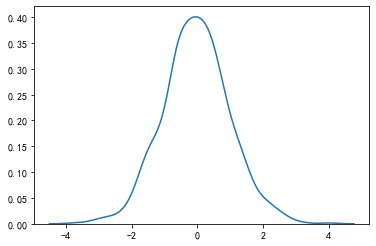

In [3]:
data = np.random.randn(1000)#生产标准正态
sns.kdeplot(data);
#大多数密度图使用的是核密度估计

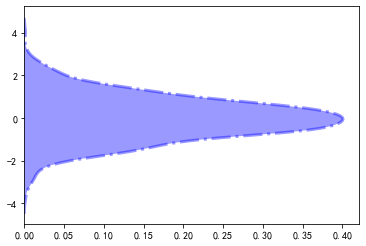

In [9]:
#给密度图添加一些简单装饰
sns.kdeplot(data
            ,shade=True
            ,vertical=True
            ,color='b'
            ,alpha=0.4
            ,linewidth=3
            ,linestyle='-.'
           );

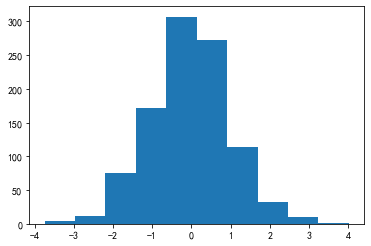

In [10]:
plt.hist(data);

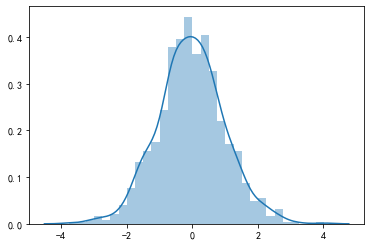

In [30]:
sns.distplot(data);

In [ ]:
#尝试图形中的参数
sns.distplot(X
             ,bins=20#箱的个数
             #,hist=False 直方图消失
             #,kde=False 曲线消失
             #,hist_kws={'color':'g','histtype':'bar','alpha':0.4} 
             #,kde_kws={'color':'r','linestyle':'--','linewidth':3,'alpha':0.7}
            );

In [11]:
#导入数据
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [12]:
df.shape

(234, 11)

In [13]:
df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [14]:
name = ["汽车制造商","型号名称","发动机排量(L)","制造年份","气缸数量","手动/自动"
              ,"驱动类型","城市里程/加仑","公路里程/加仑","汽油种类","车辆类型"]

In [15]:
[*zip(df.columns,np.array(name))]

[('manufacturer', '汽车制造商'),
 ('model', '型号名称'),
 ('displ', '发动机排量(L)'),
 ('year', '制造年份'),
 ('cyl', '气缸数量'),
 ('trans', '手动/自动'),
 ('drv', '驱动类型'),
 ('cty', '城市里程/加仑'),
 ('hwy', '公路里程/加仑'),
 ('fl', '汽油种类'),
 ('class', '车辆类型')]

In [17]:
df.cty.values

array([18, 21, 20, 21, 16, 18, 18, 18, 16, 20, 19, 15, 17, 17, 15, 15, 17,
       16, 14, 11, 14, 13, 12, 16, 15, 16, 15, 15, 14, 11, 11, 14, 19, 22,
       18, 18, 17, 18, 17, 16, 16, 17, 17, 11, 15, 15, 16, 16, 15, 14, 13,
       14, 14, 14,  9, 11, 11, 13, 13,  9, 13, 11, 13, 11, 12,  9, 13, 13,
       12,  9, 11, 11, 13, 11, 11, 11, 12, 14, 15, 14, 13, 13, 13, 14, 14,
       13, 13, 13, 11, 13, 18, 18, 17, 16, 15, 15, 15, 15, 14, 28, 24, 25,
       23, 24, 26, 25, 24, 21, 18, 18, 21, 21, 18, 18, 19, 19, 19, 20, 20,
       17, 16, 17, 17, 15, 15, 14,  9, 14, 13, 11, 11, 12, 12, 11, 11, 11,
       12, 14, 13, 13, 13, 21, 19, 23, 23, 19, 19, 18, 19, 19, 14, 15, 14,
       12, 18, 16, 17, 18, 16, 18, 18, 20, 19, 20, 18, 21, 19, 19, 19, 20,
       20, 19, 20, 15, 16, 15, 15, 16, 14, 21, 21, 21, 21, 18, 18, 19, 21,
       21, 21, 22, 18, 18, 18, 24, 24, 26, 28, 26, 11, 13, 15, 16, 17, 15,
       15, 15, 16, 21, 19, 21, 22, 17, 33, 21, 19, 22, 21, 21, 21, 16, 17,
       35, 29, 21, 19, 20

In [20]:
df.cyl.value_counts()

4    81
6    79
8    70
5     4
Name: cyl, dtype: int64

In [24]:
c4=df.loc[df.cyl==4,'cty'].values
c4

array([18, 21, 20, 21, 18, 16, 20, 19, 19, 22, 18, 28, 24, 25, 23, 24, 26,
       25, 24, 21, 18, 18, 21, 21, 19, 19, 20, 20, 21, 19, 23, 23, 18, 18,
       20, 19, 20, 18, 21, 19, 19, 19, 20, 20, 19, 20, 15, 16, 21, 21, 21,
       21, 21, 21, 21, 22, 24, 24, 26, 28, 26, 15, 16, 17, 21, 19, 21, 22,
       33, 21, 19, 22, 21, 35, 29, 21, 19, 21, 18, 19, 21], dtype=int64)

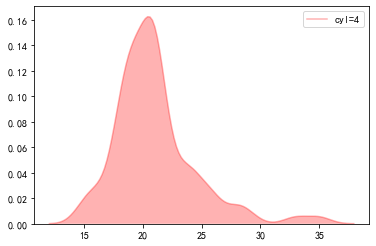

In [26]:
sns.kdeplot(c4
           ,shade=True
           ,color='r'
           ,alpha=0.3
           ,label='cyl=4');

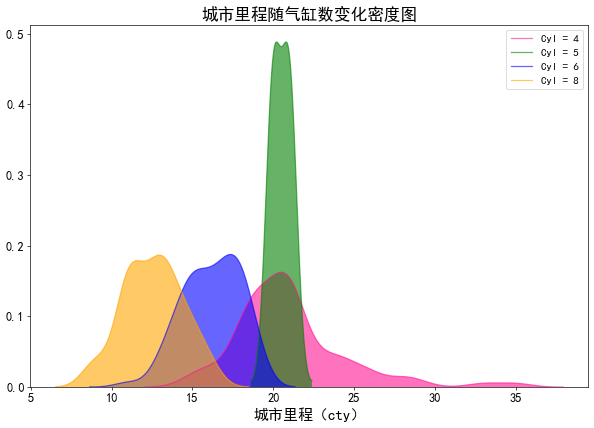

In [27]:
c4 = df.loc[df.cyl==4,'cty'].values
c5 = df.loc[df.cyl==5,'cty'].values
c6 = df.loc[df.cyl==6,'cty'].values
c8 = df.loc[df.cyl==8,'cty'].values

plt.figure(figsize=(12,8),dpi=60)

sns.kdeplot(c4,shade=True,color='deeppink',alpha=0.6,label='Cyl = 4')
sns.kdeplot(c5,shade=True,color='green',alpha=0.6,label='Cyl = 5')
sns.kdeplot(c6,shade=True,color='blue',alpha=0.6,label='Cyl = 6')
sns.kdeplot(c8,shade=True,color='orange',alpha=0.6,label='Cyl = 8')

plt.title('城市里程随气缸数变化密度图',fontsize=20)
plt.xlabel('城市里程（cty）',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=13);


In [31]:
df['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

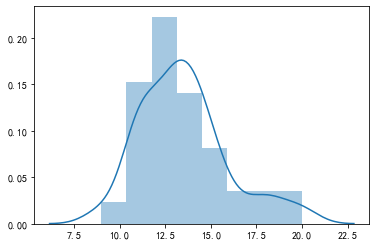

In [33]:
#绘制SUV的

x1=df.loc[df['class']=='suv','cty'].values

sns.distplot(x1,label='suv')

In [34]:
#将所有类型放到一个列表中
clas = list(set(df['class'].values))
clas

['compact', 'midsize', 'minivan', '2seater', 'subcompact', 'suv', 'pickup']

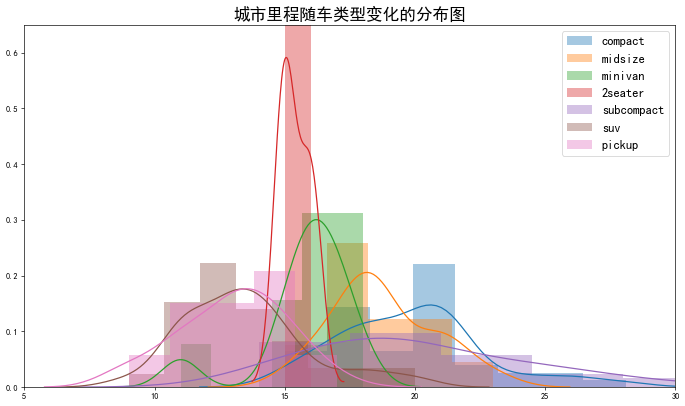

In [37]:
plt.figure(figsize = (14,8),dpi = 60)

for i in clas:
    sns.distplot(df.loc[df["class"]== i,'cty'].values,label=i)
    
plt.title('城市里程随车类型变化的分布图',fontsize=20)
plt.ylim(0,0.65)
plt.xlim(5,30)
plt.legend(fontsize=15);


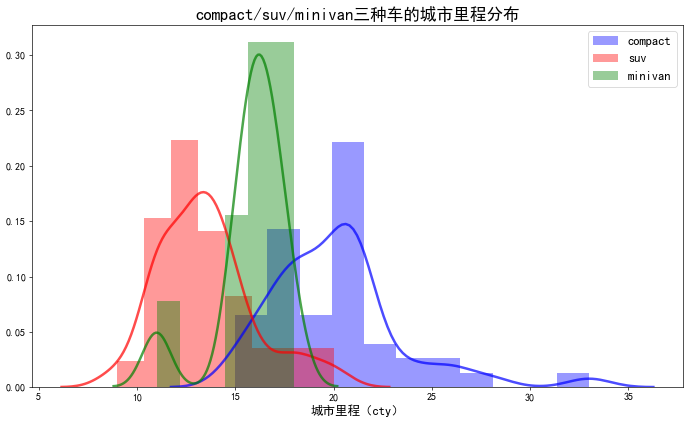

In [38]:
#提取出compact/suv/minivan这三种车的城市里程
compact = df.loc[df['class'] == 'compact', 'cty'].values
suv = df.loc[df['class'] == 'suv', 'cty'].values
minivan = df.loc[df['class'] == 'minivan', 'cty'].values

#创建画布
plt.figure(figsize = (14,8),dpi = 60)

#绘制图形
sns.distplot(compact,color='b',label='compact', hist_kws={'alpha':.4},kde_kws={'linewidth':3,'alpha':.7})
sns.distplot(suv,color='r',label='suv', hist_kws={'alpha':.4},kde_kws={'linewidth':3,'alpha':.7})
sns.distplot(minivan,color='g',label='minivan', hist_kws={'alpha':.4},kde_kws={'linewidth':3,'alpha':.7})

#装饰图形
plt.title('compact/suv/minivan三种车的城市里程分布',fontsize=20)
plt.xlabel('城市里程（cty）',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=15);